In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:
def expMax(N,lamb):
  m = 0
  for i in range(N):
    m = max(m, (-1/lamb) * np.log(np.random.uniform(0,1)))
  return m

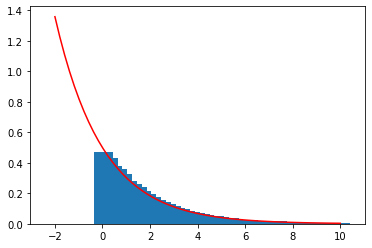

In [ ]:
#Testing simulation of gumbel variable

lamb = 0.5
N = 10**5
A, B, intervals = -2, 10, 60
width = (B - A)/intervals
freq = np.zeros(intervals)

for i in range(N):
  rnd = (-1/lamb) * math.log(np.random.uniform(0,1))
  index = (rnd + 2) * 5
  if (index >= 0 and index < intervals):
    freq[int(index)] += 1

freq = freq/(N * width)
#freq[0] = # of things between -2 and -1.99
xvalues = np.linspace(A, B, intervals)

yGumbel = lamb * np.exp(-1 * lamb * xvalues)


#plt.figure(figsize=(8,8))
plt.bar(xvalues, freq)
plt.plot(xvalues, yGumbel, color = "r")
plt.show()

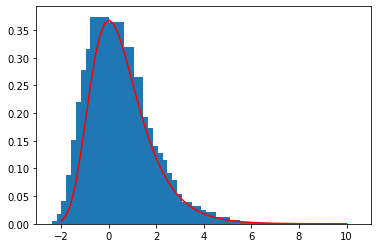

In [ ]:
#Testing simulation of gumbel variable

N = 10**4
n = 10**2
lamb = 1
A, B, intervals = -2, 10, 60
width = (B - A)/intervals
freq = np.zeros(intervals)

for i in range(N):
  rnd = 0
  for j in range(n):
    rnd = max(rnd, (-1/lamb) * math.log(np.random.uniform(0,1)))
  rnd -= np.log(n)
  index = (rnd + 2) * 5
  if (index >= 0 and index < intervals):
    freq[int(index)] += 1

freq = freq/(N * width)
#freq[0] = # of things between -2 and -1.99
xvalues = np.linspace(A, B, intervals)
yGumbel = np.exp(-(xvalues + np.exp(-xvalues)))

#plt.figure(figsize=(8,8))
plt.bar(xvalues, freq)
plt.plot(xvalues, yGumbel, color = "r")
plt.show()

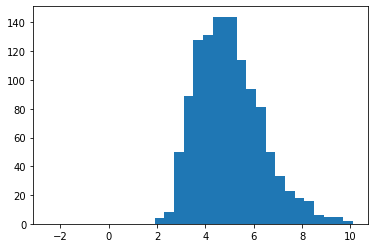

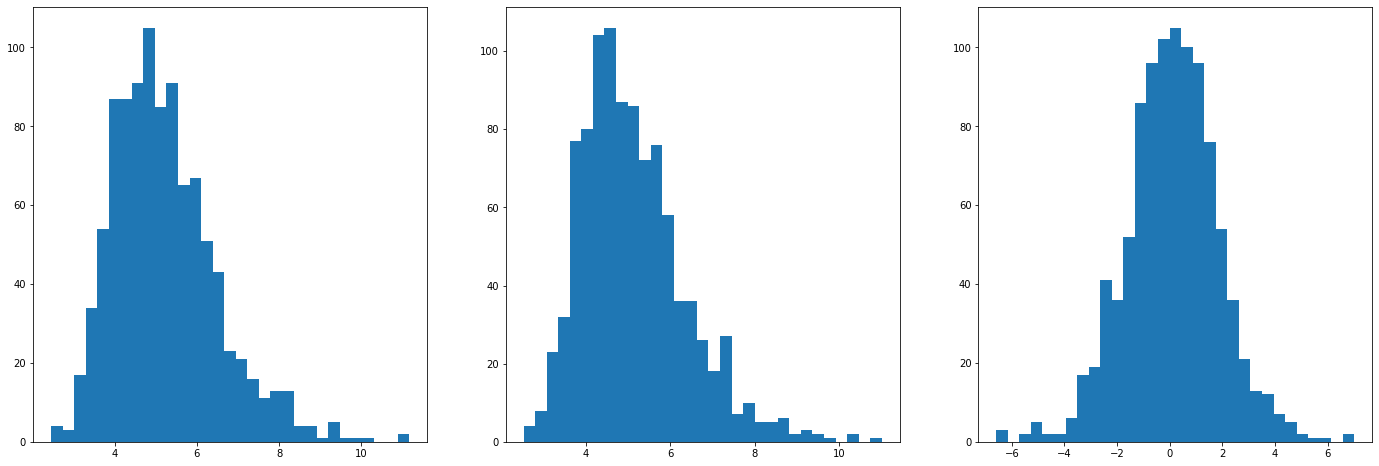

In [ ]:
N = 10**3
n = 10**2
lamb = 1

ySim = np.zeros(N)
yD = np.zeros(N)
yDiff = np.zeros(N)

for i in range(N):
  ySim[i] = -np.log(1 - np.random.uniform(0, 1) ** (1/n))
  yD[i] = expMax(n, lamb)
  yDiff[i] = ySim[i] - yD[i]

hist1, bins1 = np.histogram(ySim,range=(-2,10), bins=30)
hist2, bins2 = np.histogram(yD,range=(-2,10), bins=30)
hist3 = hist2 - hist1

plt.bar(bins1[:-1],hist1,width=1)

hist1 = np.histogram

plt.figure(figsize = (24,8))
plt.subplot(131)
hist1 = plt.hist(ySim, 31)
plt.subplot(132)
hist2 = plt.hist(yD, 31)
plt.subplot(133)
plt.hist(yDiff, 31)
plt.show()

Streaming output truncated to the last 5000 lines.
50000
50010
50020
50030
50040
50050
50060
50070
50080
50090
50100
50110
50120
50130
50140
50150
50160
50170
50180
50190
50200
50210
50220
50230
50240
50250
50260
50270
50280
50290
50300
50310
50320
50330
50340
50350
50360
50370
50380
50390
50400
50410
50420
50430
50440
50450
50460
50470
50480
50490
50500
50510
50520
50530
50540
50550
50560
50570
50580
50590
50600
50610
50620
50630
50640
50650
50660
50670
50680
50690
50700
50710
50720
50730
50740
50750
50760
50770
50780
50790
50800
50810
50820
50830
50840
50850
50860
50870
50880
50890
50900
50910
50920
50930
50940
50950
50960
50970
50980
50990
51000
51010
51020
51030
51040
51050
51060
51070
51080
51090
51100
51110
51120
51130
51140
51150
51160
51170
51180
51190
51200
51210
51220
51230
51240
51250
51260
51270
51280
51290
51300
51310
51320
51330
51340
51350
51360
51370
51380
51390
51400
51410
51420
51430
51440
51450
51460
51470
51480
51490
51500
51510
51520
51530
51540
51550
51560
51570
5

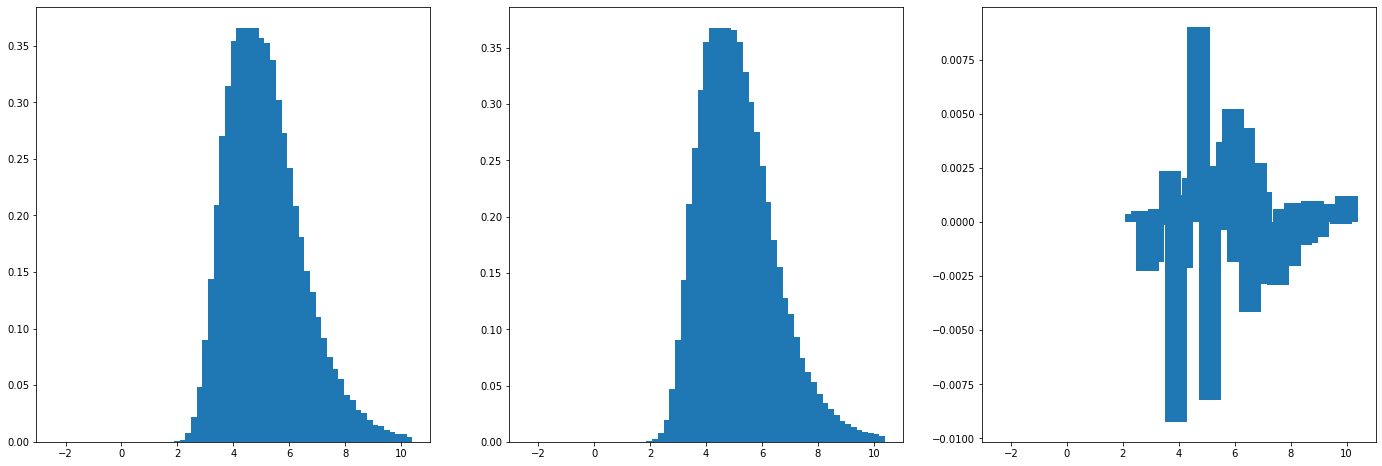

In [ ]:
#Testing simulation of max of D distributions

N = 10**5
n = 10**2
lamb = 1
A, B, intervals = -2, 10, 60
width = (B - A)/intervals
freq1 = np.zeros(intervals)
freq2 = np.zeros(intervals)


for i in range(N):
  rnd = -np.log(1 - np.random.uniform(0, 1) ** (1/n))
  index = (rnd + 2) * 5
  if (index >= 0 and index < intervals):
    freq1[int(index)] += 1

freq1 = freq1/(N * width)
#freq[0] = # of things between -2 and -1.99
xvalues = np.linspace(A, B, intervals)

for i in range(N):
  if (i % 10 == 0):
    print(i)
  rnd = expMax(n, lamb)
  index = (rnd + 2) * 5
  if (index >= 0 and index < intervals):
    freq2[int(index)] += 1

freq2 = freq2/(N * width)

freq3 = freq2 - freq1


plt.figure(figsize=(24,8))
plt.subplot(1, 3, 1)
plt.bar(xvalues, freq1)
plt.subplot(1, 3, 2)
plt.bar(xvalues, freq2)
plt.subplot(1, 3, 3)
plt.bar(xvalues, freq3)
plt.show()

In [ ]:
# specifically for standard exp (lambda = 1)
def expMax2(N, lamb):
  rnd = -np.log(1 - np.random.uniform(0, 1) ** (1/N))
  return rnd

In [ ]:
def simulate(N,n,m,lamb):
  T = np.zeros((n+1,m+1))
  U = np.zeros((n+1,m+1))
  V = np.zeros((n+1,m+1))
  for x in range(m+1):
    for y in range(n+1):
      U[x][y] = expMax2(N,lamb)
      V[x][y] = expMax2(N,lamb)

  T[1][1] = expMax2(N,lamb)
  for x in range(2,m+1):
    T[x][1] = T[x-1][1] + U[x][1]
  
  for y in range(2,n+1):
    T[1][y] = T[1][y-1] + V[1][y]
  
  for x in range(2,m+1):
    for y in range(2,n+1):
      T[x][y] = max(T[x-1][y] + U[x][y], T[x][y-1] + V[x][y])
  
  return T[n][m]

In [ ]:
def calcLPT2(n,m):
  T = np.zeros((n+1,m+1))
  U = -np.log(-np.log(np.random.random((m + 1, n + 1))))
  V = -np.log(-np.log(np.random.random((m + 1, n + 1))))

  T[1][1] = -np.log(-np.log(np.random.uniform(0,1)))
  for x in range(2,m+1):
    T[x][1] = T[x-1][1] + U[x][1]
  
  for y in range(2,n+1):
    T[1][y] = T[1][y-1] + V[1][y]
  
  for x in range(2,m+1):
    for y in range(2,n+1):
      T[x][y] = max(T[x-1][y] + U[x][y], T[x][y-1] + V[x][y])
  
  return T[n][m]

In [ ]:
def run(x):
  # m and n are coordinates
  m = 100
  n = 100
  lamb = 1

  nums = 100
  sum = 0
  for j in range(nums):
    sum += simulate(int(x), n, m, lamb) - np.log(x) * (m+n-1)
  return sum / nums

In [ ]:
nums = 1000
sum = 0
for i in range(nums):
  sum += calcLPT2(100,100)
print(sum / nums)

371.8060014579641


In [ ]:
print(run(100))
print(run(500))
print(run(1000))
print(run(5000))
print(run(10000))
print(run(100000))

371.97891356863516
371.457292019366
372.36807581215044
371.5845233639673
373.2109799840208
370.63810074435935


In [ ]:
m = 100
n = 100
lamb = 1
x = 10000
nums = 10000
Yd = np.zeros(nums)
Yg = np.zeros(nums)
for i in range(nums):
  if (i % 100 == 0):
    print(i)
  Yd[i] = simulate(int(x), n, m, lamb) - np.log(x) * (m+n-1)
  Yg[i] = calcLPT2(m,n)

A, B = np.minimum(Yd, Yg), np.maximum(Yd, Yg)
hist1, _ = np.histogram(Yd, bins= int(np.sqrt(x)), density = True)
hist2, _ = np.histogram(Yg, bins= int(np.sqrt(x)), density = True)

totalVariationDistance = 0.5 * np.sum(np.absolute(hist1 - hist2))
print(totalVariationDistance)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
0.06209743851612942


In [ ]:
m = 100
n = 100
lamb = 1
X = np.linspace(2000,100000,50)

# calculating average Tmn
nums = 1000
sum = 0
for i in range(nums):
  if i % 10 == 0:
    print(i)
  sum += calcLPT2(m,n)

Yg = np.zeros(50)
for i in range(len(Yg)):
  print(i)
  Yg[i] = sum / nums

Yd = np.zeros(50)
for i in range(len(X)):
  print(i)
  Yd[i] = run(X[i])

plt.plot(X, Yd)
plt.plot(X, Yg, color = "r")
plt.show()

In [ ]:
sum = 0
N = 500
calcLPT2(100,100)

In [ ]:
print(y)

In [ ]:
print(calcLPT(50,50))